In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder

In [ ]:
house = pd.read_csv('https://raw.githubusercontent.com/EllaMahaliaaa/Predicting-House-Prices/main/Housing.csv')

In [ ]:
house.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


<ipython-input-4-f0f20326303e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(house.corr())


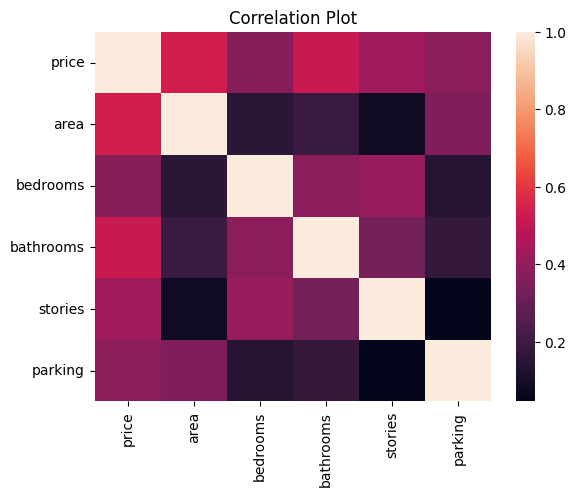

In [ ]:
sns.heatmap(house.corr())
plt.title('Correlation Plot')
plt.show()

In [ ]:
house.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [ ]:
house.shape

(545, 13)

In [ ]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
house.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [ ]:
print(house.mainroad.value_counts())
print(house.guestroom.value_counts())
print(house.basement.value_counts())
print(house.hotwaterheating.value_counts())
print(house.airconditioning.value_counts())

yes    468
no      77
Name: mainroad, dtype: int64
no     448
yes     97
Name: guestroom, dtype: int64
no     354
yes    191
Name: basement, dtype: int64
no     520
yes     25
Name: hotwaterheating, dtype: int64
no     373
yes    172
Name: airconditioning, dtype: int64


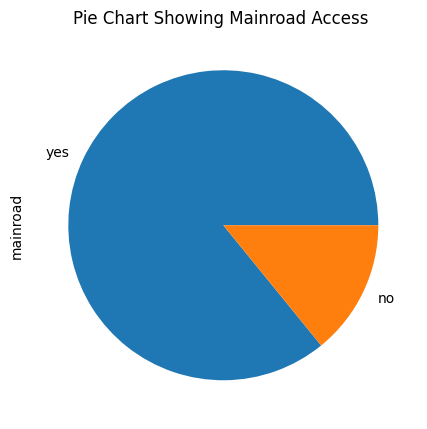

In [ ]:
data = house.mainroad.value_counts()
mainroad_count = house['mainroad'].value_counts()
plt.figure(figsize=(5,10))
data.plot.pie( title = 'Pie Chart Showing Mainroad Access ')
plt.show()

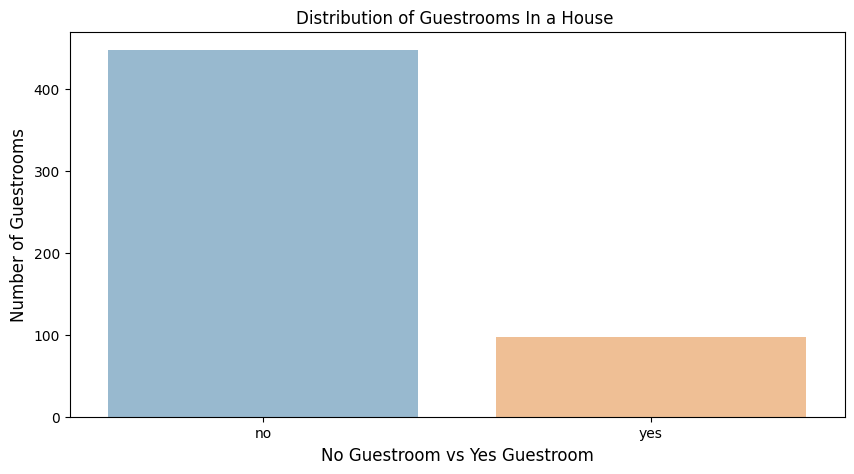

In [ ]:
guestroom_count  = house['guestroom'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x = guestroom_count.index, y= guestroom_count.values,  alpha=0.5)
plt.title('Distribution of Guestrooms In a House ')
plt.ylabel('Number of Guestrooms', fontsize=12)
plt.xlabel('No Guestroom vs Yes Guestroom', fontsize=12)
plt.show()

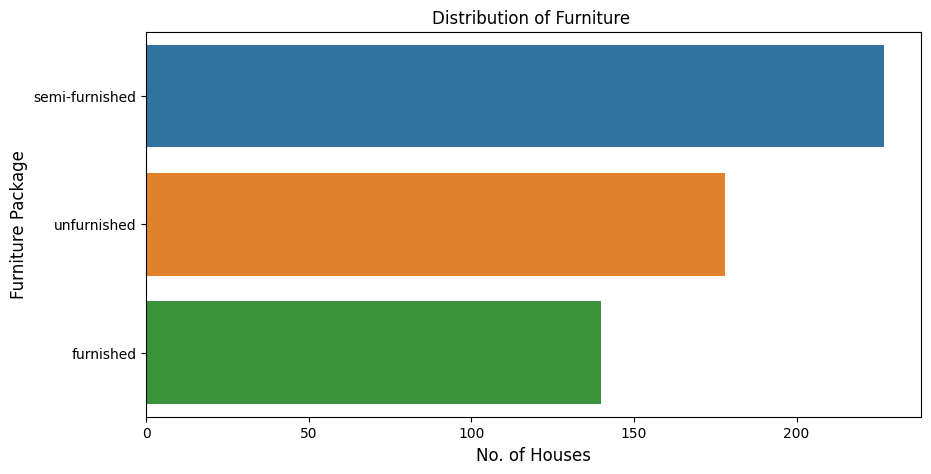

In [ ]:
furnishingstatus_count  = house['furnishingstatus'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x= furnishingstatus_count.values, y = furnishingstatus_count.index,   alpha=1, orient = 'h')
plt.title('Distribution of Furniture ')
plt.ylabel('Furniture Package', fontsize=12)
plt.xlabel('No. of Houses', fontsize=12)
plt.show()

In [ ]:
house

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
house.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [ ]:
encoder = OneHotEncoder(sparse=False, drop='first')

categorical_columns = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']
house_categorical = house[categorical_columns]

In [ ]:
house_encoded = encoder.fit_transform(house_categorical)

columns = encoder.get_feature_names_out(categorical_columns)
house_encoded_df = pd.DataFrame(house_encoded, columns=columns)

house = house.drop(categorical_columns, axis=1)
house = pd.concat([house,house_encoded_df], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
house

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,12250000,8960,4,4,4,3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,12250000,9960,3,2,2,2,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,12215000,7500,4,2,2,3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,11410000,7420,4,1,2,2,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
541,1767150,2400,3,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
542,1750000,3620,2,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
543,1750000,2910,3,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X = house.drop('price', axis = 1)
y = house[('price')]

In [ ]:
X.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad_yes',
       'guestroom_yes', 'basement_yes', 'hotwaterheating_yes',
       'airconditioning_yes', 'prefarea_yes',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

In [ ]:
X

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,8960,4,4,4,3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,9960,3,2,2,2,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,7500,4,2,2,3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,7420,4,1,2,2,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
541,2400,3,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
542,3620,2,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
543,2910,3,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 2)

In [ ]:
from sklearn.linear_model import LinearRegression

#Load the linear regression model
LR = LinearRegression()

LR.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = LR.predict(X_test)
coefficents = LR.coef_

print(f'Coefficients {coefficents}')

Coefficients [ 2.33619259e+02  7.07225089e+04  9.66654305e+05  4.31441109e+05
  2.86048480e+05  3.19455190e+05  3.48490707e+05  3.92719633e+05
  8.27971841e+05  9.30041162e+05  6.59642211e+05 -1.07246085e+05
 -5.04525804e+05]


In [ ]:
intercept = LR.intercept_

from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,y_pred)

rmse = mean_squared_error(y_test,y_pred,squared=False)

print(f'Intercept{intercept}')
print(f'R2:{r2}')
print(f'MSE: {mse}')
print(f'MAE {mae}')
print(f'RMSE: {rmse}')

Intercept354914.6598885292
R2:0.653543370688221
MSE: 1273374898779.1763
MAE 831635.0030526065
RMSE: 1128439.1427007378


In [ ]:
import pickle
with open('house_price_prediction.pkl','wb') as f:
  pickle.dump(LR, f)